1) Prepare a classification model using SVM for salary data 

for salary data 

Data Description:


age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,roc_curve

In [2]:
train = pd.read_csv('SalaryData_Train.csv')

In [3]:
test = pd.read_csv('SalaryData_Test.csv')

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [10]:
train.duplicated().sum()

3258

In [11]:
train.shape

(30161, 14)

In [16]:
train.duplicated().sum()

3258

In [17]:
Train=train.drop_duplicates()

In [18]:
Train.shape

(26903, 14)

In [19]:
test.duplicated().sum()

930

In [20]:
test.shape

(15060, 14)

In [21]:
Test=test.drop_duplicates()

In [22]:
Test.shape

(14130, 14)

In [23]:
train.isnull().sum().any()

False

In [24]:
test.isnull().sum().any()

False

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

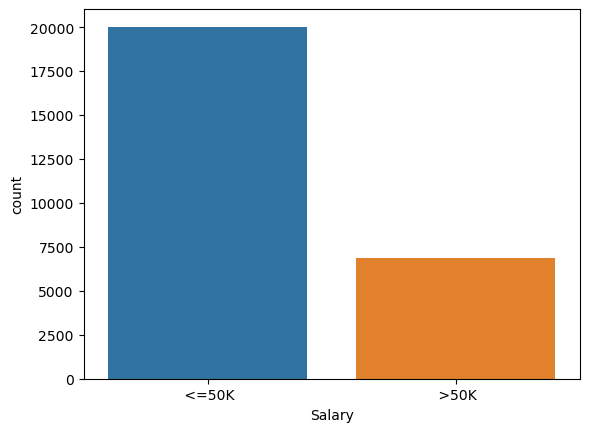

In [25]:
sn.countplot(x='Salary',data= Train)
Train['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

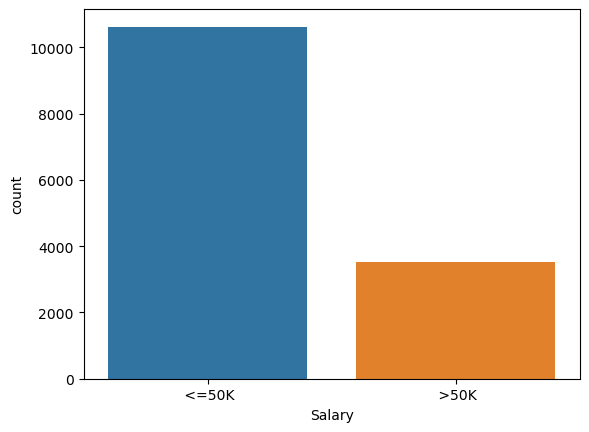

In [26]:
sn.countplot(x='Salary',data= Test)
Test['Salary'].value_counts()

> It means more people are of Salary less than 50k

<AxesSubplot:xlabel='age'>

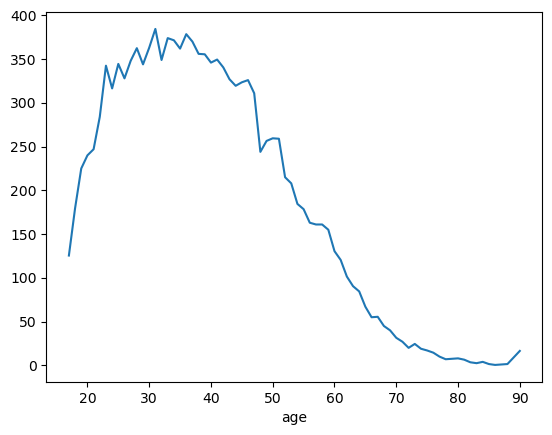

In [27]:
pd.crosstab(Train['Salary'],Train['age']).mean().plot(kind='line')

> More data of people around 30 years old

<AxesSubplot:xlabel='workclass'>

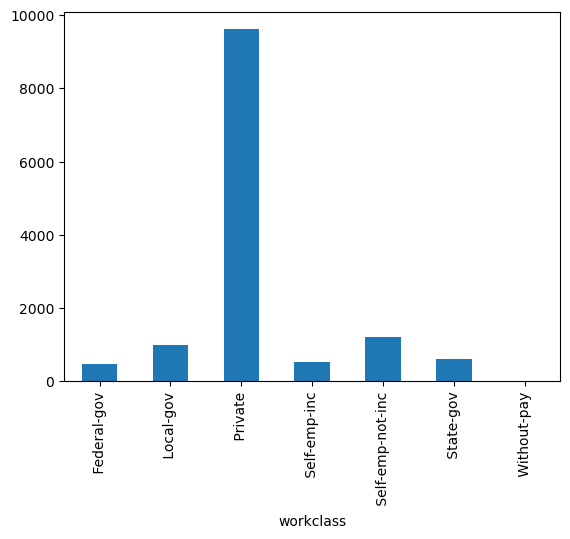

In [28]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

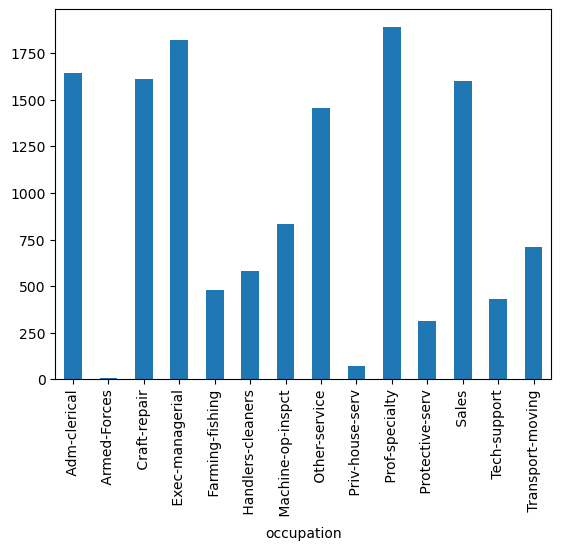

In [29]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

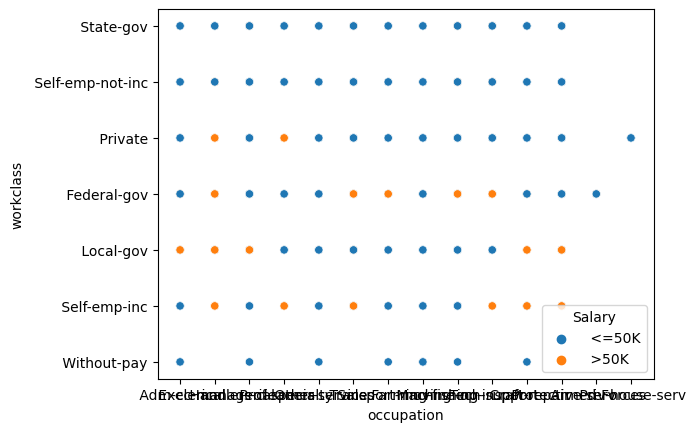

In [30]:
sn.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])

<AxesSubplot:xlabel='education'>

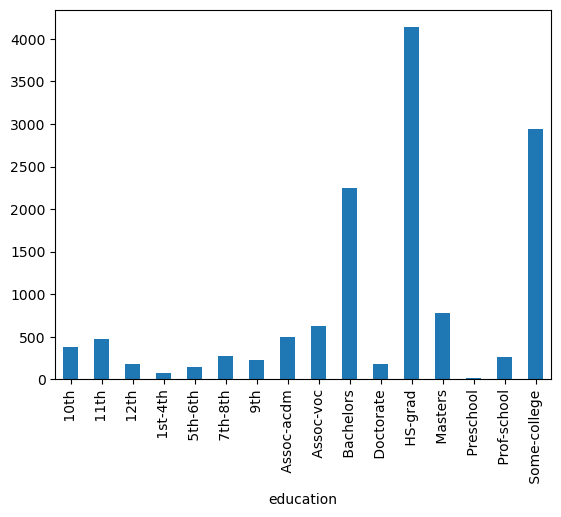

In [31]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

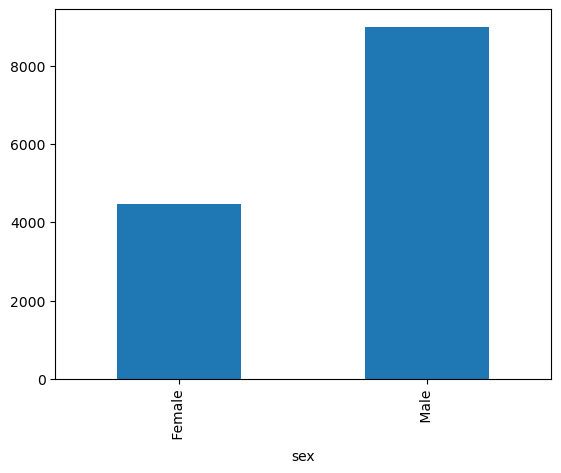

In [32]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='maritalstatus'>

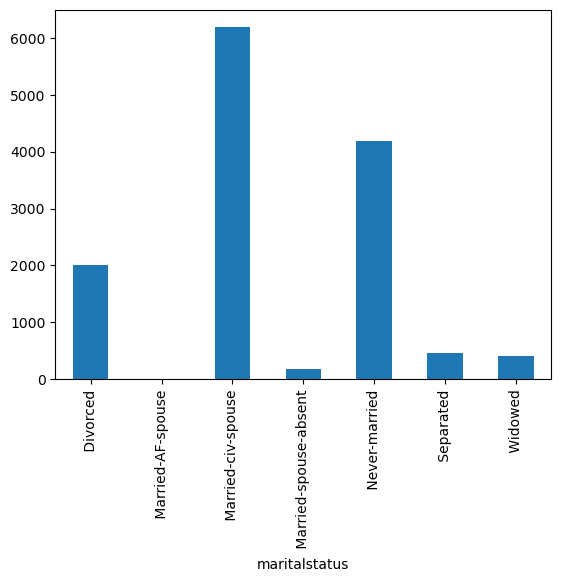

In [33]:
pd.crosstab(Train['Salary'],Train['maritalstatus']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

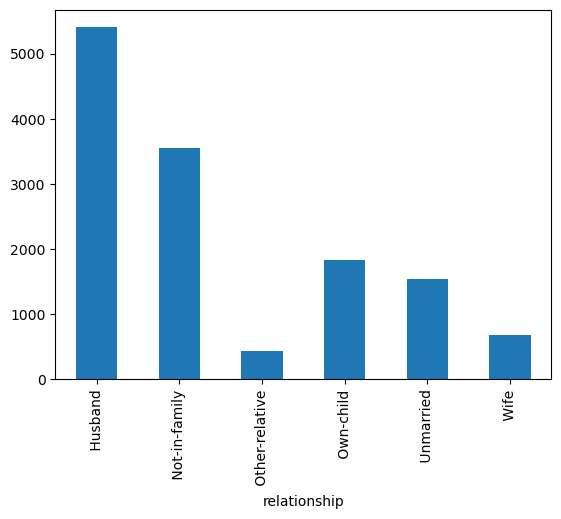

In [34]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship', ylabel='maritalstatus'>

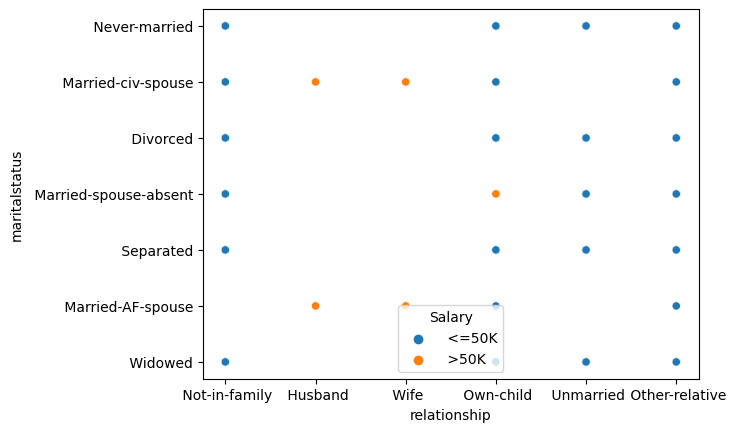

In [35]:
sn.scatterplot(Train['relationship'],Train['maritalstatus'],hue=Train['Salary'])

<AxesSubplot:xlabel='race'>

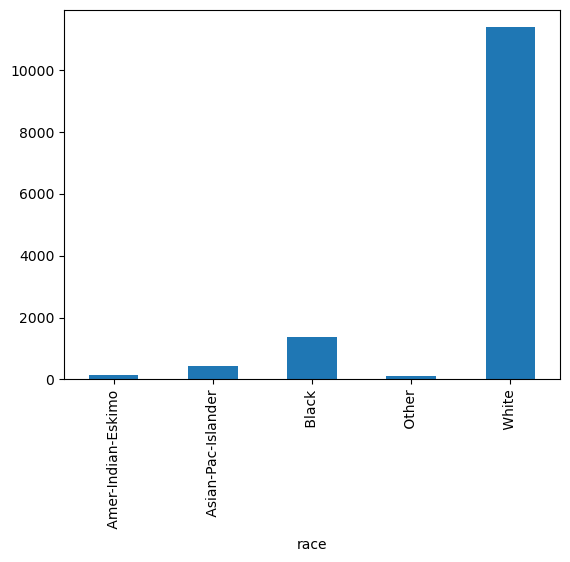

In [36]:
pd.crosstab(Train['Salary'],Train['race']).mean().plot(kind='bar')

In [37]:
A = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
B= ['Salary']

In [38]:
number = LabelEncoder()
for i in A:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [39]:
number = LabelEncoder()
for i in B:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [40]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [41]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [42]:
len(Train.columns)

14

In [43]:
x_train = Train.drop(['Salary'],axis=1)
y_train= Train['Salary']
x_test = Test.drop(['Salary'],axis=1)
y_test= Test['Salary']

In [44]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26903, 13), (26903,), (14130, 13), (14130,))

In [45]:
##Normalmization 
## in place of function MinMax Scaler can be used
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# Hypertunning of parameters

In [53]:
from sklearn.model_selection import GridSearchCV, KFold
# Create the model
model = SVC()

# Define the grid search parameters
tuned_paramerters= [{'kernel':['rbf','linear','poly', 'sigmoid'],
                     'gamma': [0.1,0.01,1,1.1],
                     'C': [0.4,0.5,0.6,0.7],
                    }]

param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [54]:
grid_result= grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START C=0.4, gamma=0.1, kernel=rbf...............................
[CV 1/5; 1/64] END C=0.4, gamma=0.1, kernel=rbf;, score=0.809 total time=  32.7s
[CV 2/5; 1/64] START C=0.4, gamma=0.1, kernel=rbf...............................
[CV 2/5; 1/64] END C=0.4, gamma=0.1, kernel=rbf;, score=0.821 total time=  27.6s
[CV 3/5; 1/64] START C=0.4, gamma=0.1, kernel=rbf...............................
[CV 3/5; 1/64] END C=0.4, gamma=0.1, kernel=rbf;, score=0.823 total time=  31.5s
[CV 4/5; 1/64] START C=0.4, gamma=0.1, kernel=rbf...............................
[CV 4/5; 1/64] END C=0.4, gamma=0.1, kernel=rbf;, score=0.813 total time=  27.0s
[CV 5/5; 1/64] START C=0.4, gamma=0.1, kernel=rbf...............................
[CV 5/5; 1/64] END C=0.4, gamma=0.1, kernel=rbf;, score=0.805 total time=  26.1s
[CV 1/5; 2/64] START C=0.4, gamma=0.1, kernel=linear............................
[CV 1/5; 2/64] END C=0.4, gamma=0.1, kernel=lin

[CV 1/5; 11/64] END C=0.4, gamma=1, kernel=poly;, score=0.833 total time=  19.8s
[CV 2/5; 11/64] START C=0.4, gamma=1, kernel=poly...............................
[CV 2/5; 11/64] END C=0.4, gamma=1, kernel=poly;, score=0.839 total time=  19.4s
[CV 3/5; 11/64] START C=0.4, gamma=1, kernel=poly...............................
[CV 3/5; 11/64] END C=0.4, gamma=1, kernel=poly;, score=0.843 total time=  20.0s
[CV 4/5; 11/64] START C=0.4, gamma=1, kernel=poly...............................
[CV 4/5; 11/64] END C=0.4, gamma=1, kernel=poly;, score=0.841 total time=  22.3s
[CV 5/5; 11/64] START C=0.4, gamma=1, kernel=poly...............................
[CV 5/5; 11/64] END C=0.4, gamma=1, kernel=poly;, score=0.831 total time=  29.4s
[CV 1/5; 12/64] START C=0.4, gamma=1, kernel=sigmoid............................
[CV 1/5; 12/64] END C=0.4, gamma=1, kernel=sigmoid;, score=0.746 total time=  34.5s
[CV 2/5; 12/64] START C=0.4, gamma=1, kernel=sigmoid............................
[CV 2/5; 12/64] END C=0.4

[CV 1/5; 21/64] END C=0.5, gamma=0.01, kernel=rbf;, score=0.752 total time=  30.8s
[CV 2/5; 21/64] START C=0.5, gamma=0.01, kernel=rbf.............................
[CV 2/5; 21/64] END C=0.5, gamma=0.01, kernel=rbf;, score=0.761 total time=  31.0s
[CV 3/5; 21/64] START C=0.5, gamma=0.01, kernel=rbf.............................
[CV 3/5; 21/64] END C=0.5, gamma=0.01, kernel=rbf;, score=0.752 total time=  30.7s
[CV 4/5; 21/64] START C=0.5, gamma=0.01, kernel=rbf.............................
[CV 4/5; 21/64] END C=0.5, gamma=0.01, kernel=rbf;, score=0.749 total time=  30.4s
[CV 5/5; 21/64] START C=0.5, gamma=0.01, kernel=rbf.............................
[CV 5/5; 21/64] END C=0.5, gamma=0.01, kernel=rbf;, score=0.740 total time=  30.4s
[CV 1/5; 22/64] START C=0.5, gamma=0.01, kernel=linear..........................
[CV 1/5; 22/64] END C=0.5, gamma=0.01, kernel=linear;, score=0.804 total time=  15.9s
[CV 2/5; 22/64] START C=0.5, gamma=0.01, kernel=linear..........................
[CV 2/5; 22/6

[CV 1/5; 31/64] END C=0.5, gamma=1.1, kernel=poly;, score=0.834 total time=  20.4s
[CV 2/5; 31/64] START C=0.5, gamma=1.1, kernel=poly.............................
[CV 2/5; 31/64] END C=0.5, gamma=1.1, kernel=poly;, score=0.839 total time=  20.5s
[CV 3/5; 31/64] START C=0.5, gamma=1.1, kernel=poly.............................
[CV 3/5; 31/64] END C=0.5, gamma=1.1, kernel=poly;, score=0.843 total time=  20.5s
[CV 4/5; 31/64] START C=0.5, gamma=1.1, kernel=poly.............................
[CV 4/5; 31/64] END C=0.5, gamma=1.1, kernel=poly;, score=0.840 total time=  22.0s
[CV 5/5; 31/64] START C=0.5, gamma=1.1, kernel=poly.............................
[CV 5/5; 31/64] END C=0.5, gamma=1.1, kernel=poly;, score=0.831 total time=  22.3s
[CV 1/5; 32/64] START C=0.5, gamma=1.1, kernel=sigmoid..........................
[CV 1/5; 32/64] END C=0.5, gamma=1.1, kernel=sigmoid;, score=0.746 total time=  28.7s
[CV 2/5; 32/64] START C=0.5, gamma=1.1, kernel=sigmoid..........................
[CV 2/5; 32/6

[CV 1/5; 41/64] END .C=0.6, gamma=1, kernel=rbf;, score=0.831 total time=  23.2s
[CV 2/5; 41/64] START C=0.6, gamma=1, kernel=rbf................................
[CV 2/5; 41/64] END .C=0.6, gamma=1, kernel=rbf;, score=0.837 total time=  23.5s
[CV 3/5; 41/64] START C=0.6, gamma=1, kernel=rbf................................
[CV 3/5; 41/64] END .C=0.6, gamma=1, kernel=rbf;, score=0.840 total time=  23.4s
[CV 4/5; 41/64] START C=0.6, gamma=1, kernel=rbf................................
[CV 4/5; 41/64] END .C=0.6, gamma=1, kernel=rbf;, score=0.836 total time=  23.2s
[CV 5/5; 41/64] START C=0.6, gamma=1, kernel=rbf................................
[CV 5/5; 41/64] END .C=0.6, gamma=1, kernel=rbf;, score=0.828 total time=  23.5s
[CV 1/5; 42/64] START C=0.6, gamma=1, kernel=linear.............................
[CV 1/5; 42/64] END C=0.6, gamma=1, kernel=linear;, score=0.804 total time=  15.5s
[CV 2/5; 42/64] START C=0.6, gamma=1, kernel=linear.............................
[CV 2/5; 42/64] END C=0.6,

[CV 1/5; 51/64] END C=0.7, gamma=0.1, kernel=poly;, score=0.807 total time=  16.1s
[CV 2/5; 51/64] START C=0.7, gamma=0.1, kernel=poly.............................
[CV 2/5; 51/64] END C=0.7, gamma=0.1, kernel=poly;, score=0.818 total time=  17.2s
[CV 3/5; 51/64] START C=0.7, gamma=0.1, kernel=poly.............................
[CV 3/5; 51/64] END C=0.7, gamma=0.1, kernel=poly;, score=0.817 total time=  18.0s
[CV 4/5; 51/64] START C=0.7, gamma=0.1, kernel=poly.............................
[CV 4/5; 51/64] END C=0.7, gamma=0.1, kernel=poly;, score=0.808 total time=  15.8s
[CV 5/5; 51/64] START C=0.7, gamma=0.1, kernel=poly.............................
[CV 5/5; 51/64] END C=0.7, gamma=0.1, kernel=poly;, score=0.800 total time=  15.8s
[CV 1/5; 52/64] START C=0.7, gamma=0.1, kernel=sigmoid..........................
[CV 1/5; 52/64] END C=0.7, gamma=0.1, kernel=sigmoid;, score=0.786 total time=  23.9s
[CV 2/5; 52/64] START C=0.7, gamma=0.1, kernel=sigmoid..........................
[CV 2/5; 52/6

[CV 1/5; 61/64] END C=0.7, gamma=1.1, kernel=rbf;, score=0.832 total time=  23.6s
[CV 2/5; 61/64] START C=0.7, gamma=1.1, kernel=rbf..............................
[CV 2/5; 61/64] END C=0.7, gamma=1.1, kernel=rbf;, score=0.838 total time=  23.3s
[CV 3/5; 61/64] START C=0.7, gamma=1.1, kernel=rbf..............................
[CV 3/5; 61/64] END C=0.7, gamma=1.1, kernel=rbf;, score=0.841 total time=  23.5s
[CV 4/5; 61/64] START C=0.7, gamma=1.1, kernel=rbf..............................
[CV 4/5; 61/64] END C=0.7, gamma=1.1, kernel=rbf;, score=0.837 total time=  23.3s
[CV 5/5; 61/64] START C=0.7, gamma=1.1, kernel=rbf..............................
[CV 5/5; 61/64] END C=0.7, gamma=1.1, kernel=rbf;, score=0.830 total time=  23.6s
[CV 1/5; 62/64] START C=0.7, gamma=1.1, kernel=linear...........................
[CV 1/5; 62/64] END C=0.7, gamma=1.1, kernel=linear;, score=0.805 total time=  15.8s
[CV 2/5; 62/64] START C=0.7, gamma=1.1, kernel=linear...........................
[CV 2/5; 62/64] END

In [55]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8377875065026401, using {'C': 0.7, 'gamma': 1.1, 'kernel': 'poly'}
0.8142954246975279,0.006889620994360263 with: {'C': 0.4, 'gamma': 0.1, 'kernel': 'rbf'}
0.8059695721349177,0.0026844301975323436 with: {'C': 0.4, 'gamma': 0.1, 'kernel': 'linear'}
0.8036274196211508,0.0063275190733138855 with: {'C': 0.4, 'gamma': 0.1, 'kernel': 'poly'}
0.7832579729448721,0.005842848566593588 with: {'C': 0.4, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.7498415462915435,0.006728229328120948 with: {'C': 0.4, 'gamma': 0.01, 'kernel': 'rbf'}
0.8059695721349177,0.0026844301975323436 with: {'C': 0.4, 'gamma': 0.01, 'kernel': 'linear'}
0.7442659529709725,0.006565721955096746 with: {'C': 0.4, 'gamma': 0.01, 'kernel': 'poly'}
0.7477600037029642,0.006477286993772723 with: {'C': 0.4, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.8320259290398753,0.004955238543683021 with: {'C': 0.4, 'gamma': 1, 'kernel': 'rbf'}
0.8059695721349177,0.0026844301975323436 with: {'C': 0.4, 'gamma': 1, 'kernel': 'linear'}
0.8373414512994571,0.

### Best : 0.8377875065026401, using {'C': 0.7, 'gamma': 1.1, 'kernel': 'poly'}

## Final Model using best Score

In [57]:
Tunned_model = SVC(kernel = "poly",random_state=42,gamma=1.1,C=0.7)
Tunned_model.fit(x_train,y_train)

SVC(C=0.7, gamma=1.1, kernel='poly', random_state=42)

In [84]:
pred_test = Tunned_model.predict(x_test)
pred_test

array([0, 0, 0, ..., 1, 0, 1])

In [85]:
accuracy_score(pred_test,y_test) 

0.840622788393489

In [86]:
confusion_matrix (y_test,pred_test)        

array([[9918,  702],
       [1550, 1960]], dtype=int64)

In [61]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     10620
           1       0.74      0.56      0.64      3510

    accuracy                           0.84     14130
   macro avg       0.80      0.75      0.77     14130
weighted avg       0.83      0.84      0.83     14130



(array([[10620.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  3510.],
        [11468.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  2662.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

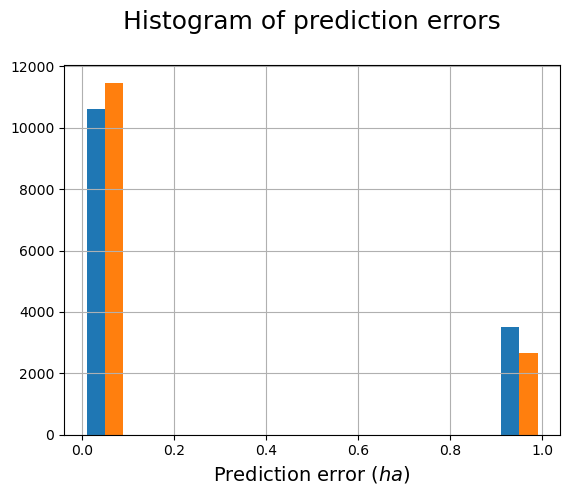

In [62]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist((y_test,pred_test),bins=10)

### TSNE for Train Data

In [73]:
from sklearn.manifold import TSNE
tmodel = TSNE(n_components=2)
tcomps = tmodel.fit_transform(x_train,y_train)

In [74]:
tcomps

array([[-23.297068,  -4.717664],
       [-44.601227,  12.82479 ],
       [-22.710789, -66.54738 ],
       ...,
       [ 23.312881, -14.428501],
       [ 38.512352, -36.261726],
       [ 25.563576, -38.39399 ]], dtype=float32)

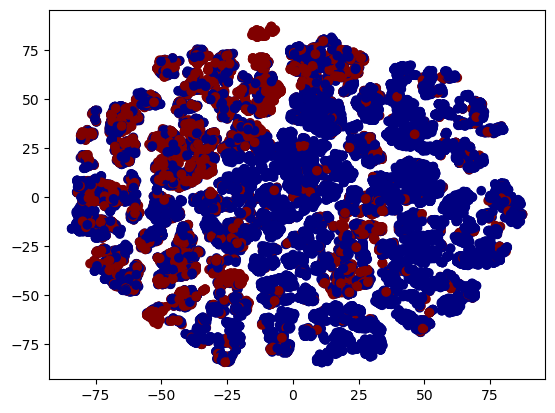

In [78]:
plt.scatter(tcomps[:,0], tcomps[:,1], c= y_train, cmap='jet')

### TSNE for Test Data

In [79]:
tmodel = TSNE(n_components=2)
tcomps = tmodel.fit_transform(x_test,y_test)

In [80]:
tcomps

array([[ 52.086254 , -16.984741 ],
       [ 17.160887 , -85.41278  ],
       [-25.984621 , -90.629395 ],
       ...,
       [-42.183376 , -65.02963  ],
       [ -3.0113506,  12.374329 ],
       [-51.5736   , -43.568886 ]], dtype=float32)

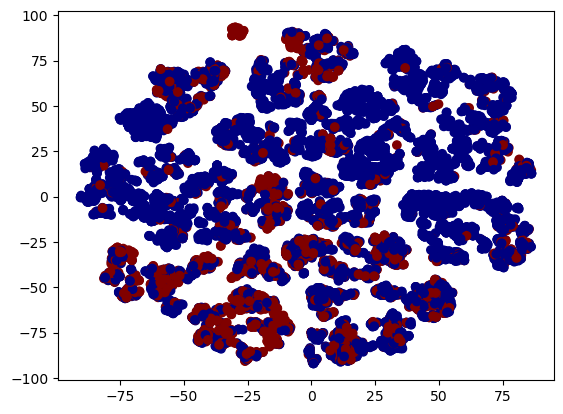

In [81]:
plt.scatter(tcomps[:,0], tcomps[:,1], c= y_test, cmap='jet')

## Final Model using best parmas

In [63]:
print('{},{} with: {}'.format(mean, stdev, param))

0.7073143077425804,0.07876207259494675 with: {'C': 0.7, 'gamma': 1.1, 'kernel': 'sigmoid'}


In [64]:
Tunned_model1 = SVC(kernel = "sigmoid",random_state=42,gamma=1.1,C=0.7)
Tunned_model1.fit(x_train,y_train)

SVC(C=0.7, gamma=1.1, kernel='sigmoid', random_state=42)

In [65]:
pred_test_1 = Tunned_model1.predict(x_test)

In [66]:
accuracy_score(pred_test_1,y_test) 

0.7455060155697099

In [67]:
print(classification_report(y_test,pred_test_1))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     10620
           1       0.36      0.03      0.06      3510

    accuracy                           0.75     14130
   macro avg       0.56      0.51      0.46     14130
weighted avg       0.66      0.75      0.66     14130



(array([[10620.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  3510.],
        [13812.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,   318.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

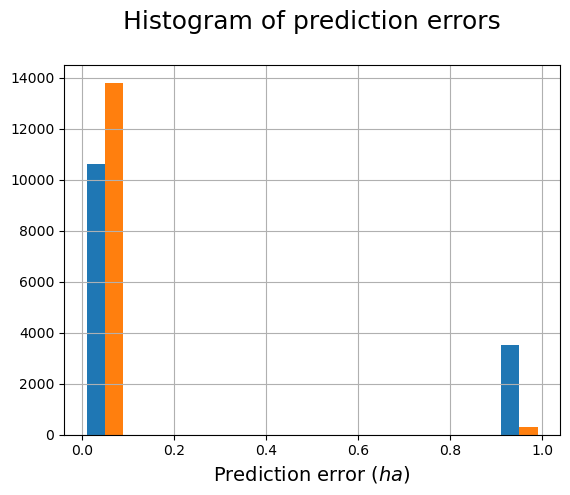

In [68]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist((y_test,pred_test_1),bins=10)

## RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
# Create the model
model = RandomForestClassifier()

# Define the grid search parameters
tuned_paramerters= [{'n_estimators':[10,30,50,70,90],
                     'max_depth': [5,10,15,20],
                     'criterion': ['gini','entropy'],
                    }]


param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [89]:
grid_result= grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 1/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.833 total time=   0.0s
[CV 2/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 2/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.842 total time=   0.0s
[CV 3/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 3/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.843 total time=   0.0s
[CV 4/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 4/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.842 total time=   0.0s
[CV 5/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 5/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.838 total time=   0.0s
[CV 1/5; 2/40] START criterion=gini, max_depth=5

[CV 2/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=0.854 total time=   1.2s
[CV 3/5; 10/40] START criterion=gini, max_depth=10, n_estimators=90.............
[CV 3/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=0.855 total time=   1.1s
[CV 4/5; 10/40] START criterion=gini, max_depth=10, n_estimators=90.............
[CV 4/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=0.852 total time=   1.1s
[CV 5/5; 10/40] START criterion=gini, max_depth=10, n_estimators=90.............
[CV 5/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=0.848 total time=   1.0s
[CV 1/5; 11/40] START criterion=gini, max_depth=15, n_estimators=10.............
[CV 1/5; 11/40] END criterion=gini, max_depth=15, n_estimators=10;, score=0.845 total time=   0.1s
[CV 2/5; 11/40] START criterion=gini, max_depth=15, n_estimators=10.............
[CV 2/5; 11/40] END criterion=gini, max_depth=15, n_estimators=10;, score=0.854 total time=   0.1s
[

[CV 3/5; 19/40] END criterion=gini, max_depth=20, n_estimators=70;, score=0.851 total time=   1.3s
[CV 4/5; 19/40] START criterion=gini, max_depth=20, n_estimators=70.............
[CV 4/5; 19/40] END criterion=gini, max_depth=20, n_estimators=70;, score=0.857 total time=   1.3s
[CV 5/5; 19/40] START criterion=gini, max_depth=20, n_estimators=70.............
[CV 5/5; 19/40] END criterion=gini, max_depth=20, n_estimators=70;, score=0.853 total time=   1.3s
[CV 1/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 1/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=0.848 total time=   1.6s
[CV 2/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 2/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=0.849 total time=   1.6s
[CV 3/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 3/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=0.854 total time=   1.6s
[

[CV 4/5; 28/40] END criterion=entropy, max_depth=10, n_estimators=50;, score=0.850 total time=   0.6s
[CV 5/5; 28/40] START criterion=entropy, max_depth=10, n_estimators=50..........
[CV 5/5; 28/40] END criterion=entropy, max_depth=10, n_estimators=50;, score=0.848 total time=   0.6s
[CV 1/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 1/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=0.844 total time=   0.9s
[CV 2/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 2/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=0.852 total time=   0.9s
[CV 3/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 3/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=0.852 total time=   0.8s
[CV 4/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 4/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=0.852 to

[CV 4/5; 37/40] END criterion=entropy, max_depth=20, n_estimators=30;, score=0.858 total time=   0.6s
[CV 5/5; 37/40] START criterion=entropy, max_depth=20, n_estimators=30..........
[CV 5/5; 37/40] END criterion=entropy, max_depth=20, n_estimators=30;, score=0.849 total time=   0.6s
[CV 1/5; 38/40] START criterion=entropy, max_depth=20, n_estimators=50..........
[CV 1/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.848 total time=   1.0s
[CV 2/5; 38/40] START criterion=entropy, max_depth=20, n_estimators=50..........
[CV 2/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.851 total time=   0.9s
[CV 3/5; 38/40] START criterion=entropy, max_depth=20, n_estimators=50..........
[CV 3/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.854 total time=   0.9s
[CV 4/5; 38/40] START criterion=entropy, max_depth=20, n_estimators=50..........
[CV 4/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.858 to

In [90]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8566703442996804, using {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 90}
0.8396461596599352,0.003931485621664395 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}
0.8421737574516974,0.0034645582356625125 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}
0.8418763804077267,0.004593282088553079 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
0.8420250862010004,0.0033538207300229735 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 70}
0.8419507574841674,0.004177970538651985 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 90}
0.8504627116337327,0.003891135372245244 with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
0.8509832060899944,0.003957146832094368 with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
0.8504627254507634,0.0035312786067991206 with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
0.8512433531446526,0.004754929682344598 with: {'criterion': 'gini', 'm

## Best : 0.8566703442996804, using {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 90}

In [91]:
rf_model = RandomForestClassifier(criterion='gini', n_estimators=90, max_depth=15, random_state=42)

In [92]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=90, random_state=42)

In [93]:
train_pred_rf = rf_model.predict(x_test)

In [94]:
confusion_matrix(y_test,train_pred_rf)

array([[9923,  697],
       [1446, 2064]], dtype=int64)

In [95]:
print(classification_report(y_test,train_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10620
           1       0.75      0.59      0.66      3510

    accuracy                           0.85     14130
   macro avg       0.81      0.76      0.78     14130
weighted avg       0.84      0.85      0.84     14130



In [96]:
fpr, tpr, thresh = roc_curve(y_test,train_pred_rf)

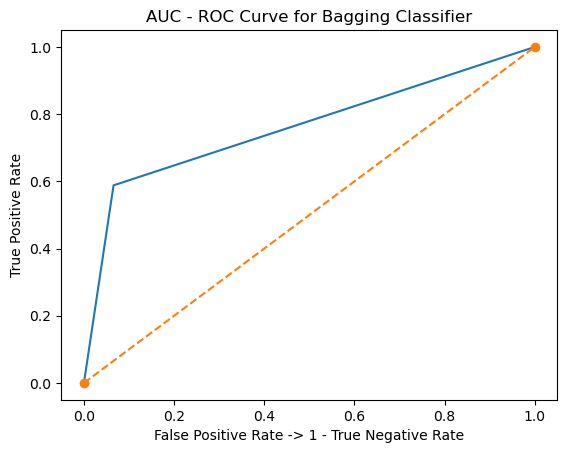

In [97]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.title('AUC - ROC Curve for Bagging Classifier')
plt.xlabel('False Positive Rate -> 1 - True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()